## Analysis

In [1]:
import pandas as pd
import numpy as np

def helper(t):
    if t == 'Gaussian':
        return 1
    else:
        return 0
    
df_bucket = pd.read_csv("bucket.csv")
df_bucket['Distribution'] = df_bucket['Distribution'].astype(str)
df_bucket['Distribution_Num'] = df_bucket.apply(lambda row: helper(row.Distribution), axis=1)

df_kd = pd.read_csv("kdtree.csv")
df_kd['Distribution'] = df_kd['Distribution'].astype(str)
df_kd['Distribution_Num'] = df_kd.apply(lambda row: helper(row.Distribution), axis=1)

df_quad = pd.read_csv("quadtree.csv")
df_quad['Distribution'] = df_quad['Distribution'].astype(str)
df_quad['Distribution_Num'] = df_quad.apply(lambda row: helper(row.Distribution), axis=1)
df_quad[:15]

,K,Dimension,Number of Points,Time,Distribution,Distribution_Num
0,1,2,50,1.382000e-06,Uniform,0
1,2,2,50,7.860000e-08,Uniform,0
2,3,2,50,7.840000e-08,Uniform,0
3,4,2,50,7.590000e-08,Uniform,0
4,5,2,50,7.650000e-08,Uniform,0
5,6,2,50,7.540000e-08,Uniform,0
6,7,2,50,7.710000e-08,Uniform,0
7,8,2,50,7.630000e-08,Uniform,0
8,9,2,50,7.570000e-08,Uniform,0
9,10,2,50,8.110000e-08,Uniform,0



### K Analysis:


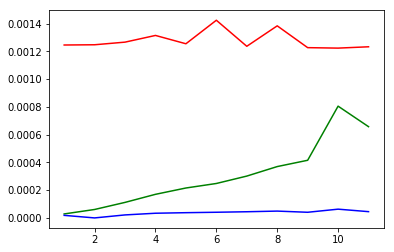

In [2]:
import matplotlib.pyplot as plt

df_k_bucket = df_bucket[(df_bucket['Dimension'] == 2) & 
                        (df_bucket['Number of Points'] == 12800) &
                        (df_bucket['Distribution'] == 'Uniform')]

df_k_kd = df_kd[(df_kd['Dimension'] == 2) & (df_kd['Number of Points'] == 12800) &
                        (df_kd['Distribution'] == 'Uniform')]

df_k_quad = df_quad[(df_quad['Dimension'] == 2) & (df_quad['Number of Points'] == 12800) &
                        (df_quad['Distribution'] == 'Uniform')]

%matplotlib inline
plt.plot(df_k_bucket["K"], df_k_bucket["Time"], 'r', df_k_kd["K"], df_k_kd["Time"], 'g', 
        df_k_quad["K"], df_k_quad["Time"], 'b')
plt.show()

From the graph above, we can clearly see that bucket tend to take more time, and the quad tree takes least time among three data structures.

K does not affect much on bucket and quadtree, but the kd tree is direct propotional to k.


### Dimension Analysis:


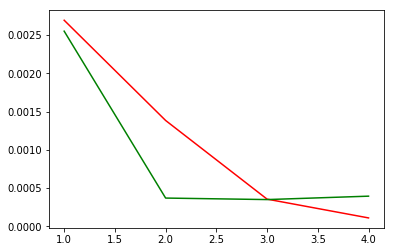

In [3]:
df_dim_bucket = df_bucket[(df_bucket['K'] == 8) & 
                        (df_bucket['Number of Points'] == 12800) &
                        (df_bucket['Distribution'] == 'Uniform')]

df_dim_kd = df_kd[(df_kd['K'] == 8) & (df_kd['Number of Points'] == 12800) &
                        (df_kd['Distribution'] == 'Uniform')]

plt.plot(df_dim_bucket["Dimension"], df_dim_bucket["Time"], 'r', df_dim_kd["Dimension"], 
         df_dim_kd["Time"], 'g')

Since quad tree always has dimension value of 2, so we don't analyze it here.

From the graph above, for most cases we can clearly see that bucket tend to take more time than kd tree. However, with the dimension increases, kd tree tends to take more time.

Time spent is reversely proportional to dimension.


### Number of points Analysis:


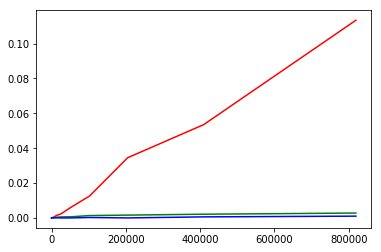

In [4]:
df_num_bucket = df_bucket[(df_bucket['Dimension'] == 2) & (df_bucket['K'] == 8) &
                        (df_bucket['Distribution'] == 'Uniform')]

df_num_kd = df_kd[(df_kd['Dimension'] == 2) & (df_kd['K'] == 8) & 
                  (df_kd['Distribution'] == 'Uniform')]

df_num_quad = df_quad[(df_quad['Dimension'] == 2) & (df_quad['K'] == 8) &
                        (df_quad['Distribution'] == 'Uniform')]

plt.plot(df_num_bucket["Number of Points"], df_num_bucket["Time"], 'r', 
         df_num_kd["Number of Points"], df_num_kd["Time"], 'g', 
         df_num_quad["Number of Points"], df_num_quad["Time"], 'b')

From the graph above, we can clearly see that bucket tend to take more time, and the quad tree takes least time among three data structures.

Number of points does not affect much on kd tree and quadtree, but the bucket is direct propotional to it.


### Distribution Analysis:


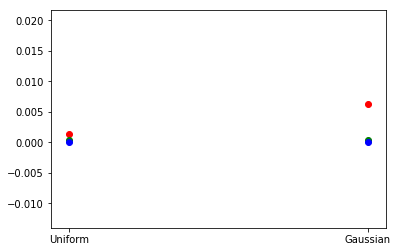

In [5]:
df_dis_bucket = df_bucket[(df_bucket['Dimension'] == 2) & 
                        (df_bucket['Number of Points'] == 12800) & (df_bucket['K'] == 8)]

df_dis_kd = df_kd[(df_kd['Dimension'] == 2) & (df_kd['Number of Points'] == 12800) &
                        (df_kd['K'] == 8)]

df_dis_quad = df_quad[(df_quad['Dimension'] == 2) & (df_quad['Number of Points'] == 12800) &
                        (df_quad['K'] == 8)]

plt.scatter(df_dis_bucket["Distribution"], df_dis_bucket["Time"], marker='o', color='r') 
plt.scatter(df_dis_kd["Distribution"], df_dis_kd["Time"], marker='o', color='g')
plt.scatter(df_dis_quad["Distribution"], df_dis_quad["Time"], marker='o', color='b')
plt.show()


From the graph above, we can clearly see that bucket tend to take more time, and the quad tree takes least time among three data structures.

For bucket, it takes more time with gaussian distribution than the uniform distribution.
For kd tree and quadtree, time spent is almost not affected by the distribution.


### Bucket Regression Analysis:


In [6]:
import statsmodels.api as sm
x = df_bucket[['K', 'Dimension', 'Number of Points', 'Distribution_Num']]
y = df_bucket['Time']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     609.3
Date:                Wed, 11 Jul 2018   Prob (F-statistic):          1.73e-297
Time:                        20:43:34   Log-Likelihood:                 1510.1
No. Observations:                1320   AIC:                            -3010.
Df Residuals:                    1315   BIC:                            -2984.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0118      0.007     -1.688      0.092      -0.026       0.002
K                 7.575e-06      0.001      0.011      0.991      -0.001       0.001
Dimension           -0.0096      0.002     -5.033      0.000      -0.013      -0.006
Number of Points  4.549e-07   9.73e-09     46.750      0.000    4.36e-07    4.74e-07
Distribution_Num     0.0639      0.004     15.040      0.000       0.056       0.072
==============================================================================
Omnibus:                      254.029   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4379.514
Skew:                           0.367   Prob(JB):                         0.00
Kurtosis:                      11.893   Cond. No.                     8.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


From the table above, time spent is mainly affected by Dimension, Number of Points and Distribution. Because the p-values are 0 for them.


### KD Tree Regression Analysis:


In [7]:
x = df_kd[['K', 'Dimension', 'Number of Points', 'Distribution_Num']]
y = df_kd['Time']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     60.86
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           3.28e-47
Time:                        20:43:34   Log-Likelihood:                 4531.4
No. Observations:                1320   AIC:                            -9053.
Df Residuals:                    1315   BIC:                            -9027.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0011      0.001      1.566      0.118      -0.000       0.003
K                    0.0005   6.81e-05      7.386      0.000       0.000       0.001
Dimension           -0.0014      0.000     -7.503      0.000      -0.002      -0.001
Number of Points  1.134e-08   9.86e-10     11.497      0.000    9.41e-09    1.33e-08
Distribution_Num    -0.0003      0.000     -0.634      0.526      -0.001       0.001
==============================================================================
Omnibus:                     2079.503   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           956747.756
Skew:                           9.695   Prob(JB):                         0.00
Kurtosis:                     133.459   Cond. No.                     8.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


From the table above, time spent is mainly affected by K, Dimension and Number of Points. Because the p-values are 0 for them.


### Quadtree Regression Analysis:


In [8]:
x = df_quad[['K', 'Dimension', 'Number of Points', 'Distribution_Num']]
y = df_quad['Time']
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     52.58
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           9.58e-28
Time:                        20:43:34   Log-Likelihood:                 2496.3
No. Observations:                 330   AIC:                            -4985.
Df Residuals:                     326   BIC:                            -4969.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
K                 6.131e-06    2.2e-06      2.790      0.006    1.81e-06    1.05e-05
Dimension        -3.001e-06    8.4e-06     -0.357      0.721   -1.95e-05    1.35e-05
Number of Points  3.822e-10   3.18e-11     12.016      0.000     3.2e-10    4.45e-10
Distribution_Num -3.283e-05   1.39e-05     -2.362      0.019   -6.02e-05   -5.49e-06
==============================================================================
Omnibus:                      180.395   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2418.047
Skew:                           1.941   Prob(JB):                         0.00
Kurtosis:                      15.681   Cond. No.                     5.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


From the table above, time spent is mainly affected by the Number of Points. Because the p-value is 0 for it.

### Unusual Aspects:
The K analysis for bucket seems unusual, because the data structure calculate and traverse differently for different K values (K dimensions to 1d array), so the graph seems shaky.